In [45]:
import numpy as np
from numpy.polynomial import Polynomial as P
import matplotlib.pyplot as plt
import random
import math
from scipy import integrate

In [46]:
def f(x): 
    return x**2 * np.cos(x)

In [47]:
def make_q(x1): 
    q = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            q[i][j] = x1[i]**j
    return q

In [48]:
n=5
m=4
a=-1.0
b=1.0
x1 = np.zeros(n)
for i in range(n):
    x1[i] = random.uniform(-1, 1)
    x1[i] = a + i * abs(b-a)/(n - 1)
    
print (x1)

[-1.  -0.5  0.   0.5  1. ]


In [49]:
f1 = np.apply_along_axis(f, 0, x1)

In [50]:
q = make_q(x1)
H = np.transpose(q) @ q
b_vec = np.transpose(q) @ f1
a_vec = np.linalg.solve(H,b_vec)
poly = P(a_vec)

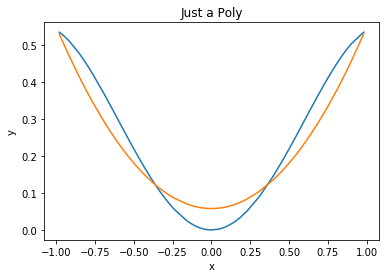

In [55]:
x_test = np.zeros(100)
for i in range(100): 
    x_test[i] = random.uniform(-1, 1)   
x_test = np.sort(x_test)
f_test = np.apply_along_axis(f, 0, x_test)
f_poly_test = np.apply_along_axis(poly, 0, x_test)
plt.plot(x_test, f_test) 
plt.plot(x_test, f_poly_test)
plt.title('Just a Poly') 
plt.xlabel('x') 
plt.ylabel('y')
plt.show() 

In [57]:
m = 4

def L(n):
    poly = P([1, 0, -1])
    poly = poly ** n
    polyder = poly.deriv(n)
    return (1/(math.factorial(n) * (2**n))) * polyder

def ck(k): 
    c_upper_func = lambda x: f(x)*L(k)(x)
    c_down_func = lambda x: (L(k)**2)(x)
    return integrate.quad(c_upper_func, a, b)[0] / integrate.quad(c_down_func, a, b)[0]

In [58]:
main_poly = P([0])
for i in range(m):
    main_poly = main_poly + (ck(i) * L(i))

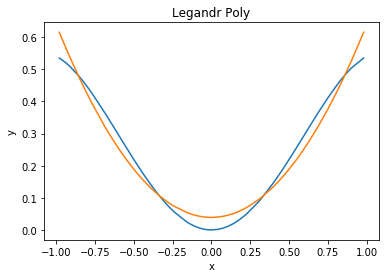

In [59]:
f_legan_test = np.apply_along_axis(main_poly, 0, x_test)
plt.plot(x_test, f_test) 
plt.plot(x_test, f_legan_test)
plt.title('Legandr Poly') 
plt.xlabel('x') 
plt.ylabel('y')
plt.show() 